In [10]:
gt_seg_dir =  '/scratch/apratik/dfeb/locobot/slam_logs/apartment_0/seg' # Label propagated segmentation maps
out_npy_dir = '/checkpoint/apratik/active/apartment_0/pred_label_f10p4' # dump *.npy segmentation maps here


MSE 2320.410804748535, over 284 frames
Display highest 5 MSE segm maps ... 


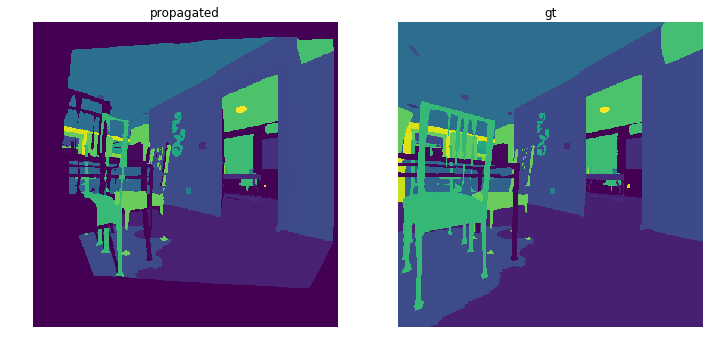

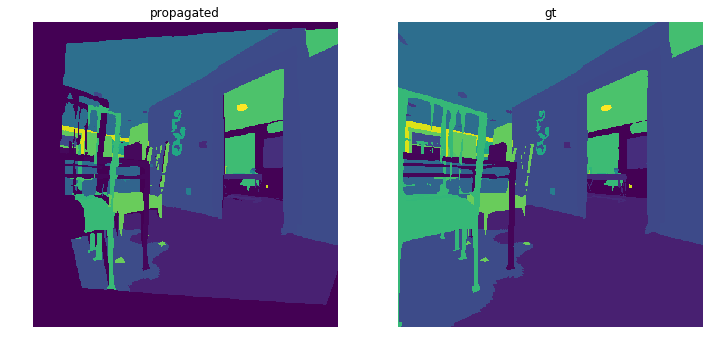

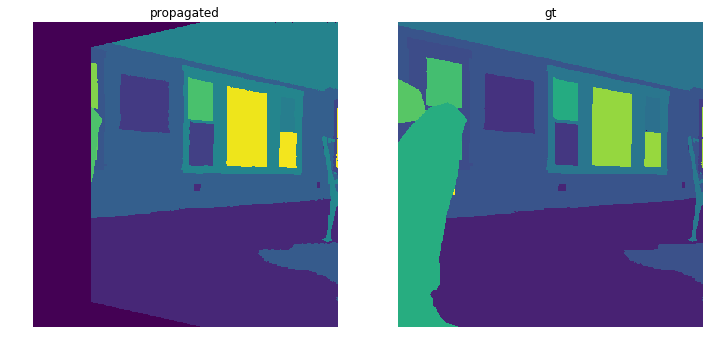

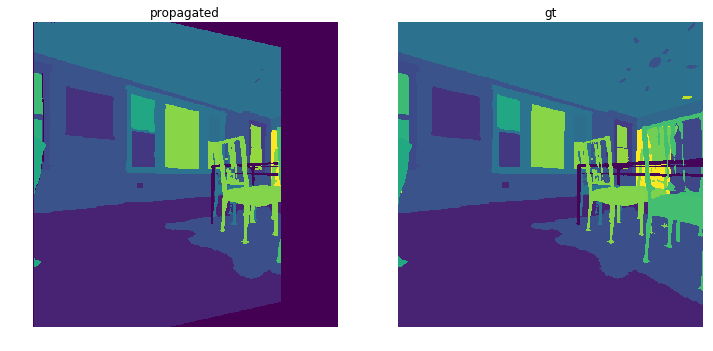

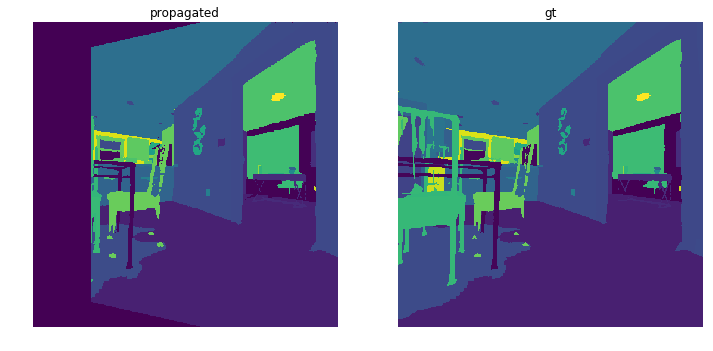

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

prop_seg = os.listdir(out_npy_dir)
mse = {}
accuracy = {}
cnt = 0
for x in prop_seg:
#     if img not in to_propogate:
    if 'npy' in x:
        img = int(x.split('.')[0])
        cnt += 1
        prop_data = np.load(os.path.join(out_npy_dir, x)).astype(np.uint8)
        gt_data = np.load(os.path.join(gt_seg_dir, x)).astype(np.uint8)
        mse[img] = (np.square(prop_data-gt_data)).mean(axis=None)
        accuracy[img] = accuracy_score(gt_data, prop_data)

print("MSE {}, over {} frames".format(sum(mse.values()), cnt))

print("Display highest 5 MSE segm maps ... ")
for k, v in sorted(mse.items(), key = lambda item: item[1], reverse=True)[:5]:
    filename = "{:05d}.npy".format(k)
    prop_data = np.load(os.path.join(out_npy_dir, filename)).astype(np.uint8)
    gt_data = np.load(os.path.join(gt_seg_dir, filename)).astype(np.uint8)
    
    plt.figure(figsize=(12 , 8))
    ax = plt.subplot(1, 2, 1)
    ax.axis('off')
    ax.set_title('propagated')
    plt.imshow(prop_data)

    ax = plt.subplot(1, 2, 2)
    ax.axis('off')
    ax.set_title("gt")
    plt.imshow(gt_data)

    plt.show()        
